## UNSUPERVISED LEARNING MINI PROJECT

### CONTEXT

> E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### CONTENT
> This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

> The data set contains 500K rows and 8 columns. The following is the description of each column.

> - **TransactionNo (categorical)**: a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
> - **Date (numeric)**: the date when each transaction was generated.
> - **ProductNo (categorical)**: a five or six-digit unique character used to identify a specific product.
> - **Product (categorical)**: product/item name.
> - **Price (numeric)**: the price of each product per unit in pound sterling (£).
> - **Quantity (numeric)**: the quantity of each product per transaction. Negative values related to cancelled transactions.
> - **CustomerNo (categorical)**: a five-digit unique number that defines each customer.
> - **Country (categorical)**: name of the country where the customer resides.

### GOAL

> Gather useful intrinsic information by combining RFM model and some unsupervised learning model.

> For each segments, analyze the data, and try to answer the following questions:

> - How was the sales trend over the months?
> - What are the most frequent purchased products?
> - How many products does the customer purchase in each transaction?
> - How does each cluster/group contribute to the company's revenue?
> - What are the interval date between transactions?
> - Based on your findings, what strategy could you recommend to the business to gain more profit?
> - ***add more if necessary***

> Also, there is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

> Therefore, try to build a supervised learning model to solve this problem.

> Source from UCI Machine Learning Repository: [link to dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

## OVERVIEW

In [91]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

> Here we will inspect the data for quality checking.

In [92]:
# load data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [93]:
# check head
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [94]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> We can see that there are 2 features with missing values (null).

In [95]:
# check null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## PREPROCESSING

> Since many of the missing values is on the important features (CustomerID), and it's considered as an identifier that will plays an important role to the RFM models, therefore we cannot do anything to this other than dropping the values on this features.

In [96]:
# dropna
df = df.dropna()

In [97]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


> Since the missing values has been handled, next we will try to create a new features (TotalCost) that will play an important role on RFM for monetary value later.

> *TotalCost = Quantity x UnitPrice*.

In [98]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["UnitPrice"]

In [99]:
# check new features
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34

> Then we will adjust the InvoiceDate format. We will create a new feature for it, so that it will fit the RFM model.

In [100]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [101]:
# check new features
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   

  TransactionDate  
0      2010-12-01  
1      2010-12-01  
2      2010-12-01  
3      2010-12-01  
4      2010-12-01

> We will also prepare the 'target' feature for supervised prediction later.

In [102]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["InvoiceNo"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [103]:
# apply target
df["cancelled"] = cancel

In [104]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 37.2+ MB


> Now that we've finished the preprocess, we will copy the data and then start to build the rfm model.

In [105]:
# create copy for rfm modeling
df1 = df.copy()

## RFM MODEL BUILDING

> create some new features called recency,frequency and monetary

> Recency shows the time of the customer's last interaction with the product.

> Frequency is about how often customers make purchases.

> monetary value measures the amount of money customers spend on each purchase transaction.

In [106]:
# last transaction date on invoice
now = pd.to_datetime(df1['TransactionDate'].max())

In [107]:
# get customers last transaction date
recency = df1.groupby(by='CustomerID', as_index=False)['TransactionDate'].max()
recency.columns = ['CustomerID', 'last_trans_date']

# calculate recency
recency['last_trans_date'] = pd.to_datetime(recency['last_trans_date'])
recency['recency'] = recency['last_trans_date'].apply(lambda x: (now - x).days)

In [108]:
recency.head()

CustomerID last_trans_date  recency
0     12346.0      2011-01-18      325
1     12347.0      2011-12-07        2
2     12348.0      2011-09-25       75
3     12349.0      2011-11-21       18
4     12350.0      2011-02-02      310

In [109]:
# calculate frequency
frequency = pd.DataFrame()
frequency['CustomerID'] = [i for i in df1['CustomerID'].unique()]
frequency['frequency'] = df1.groupby('CustomerID')['CustomerID'].transform('count')

In [110]:
# frequency table
frequency.head()

CustomerID  frequency
0     17850.0      312.0
1     13047.0      312.0
2     12583.0      312.0
3     13748.0      312.0
4     15100.0      312.0

In [111]:
frequency['frequency'] = frequency['frequency'].fillna(frequency['frequency'].median())

In [112]:
# calculate monetary
monetary = df1.groupby(by='CustomerID', as_index=False).agg({'TotalCost': 'sum'})
monetary.columns = ['CustomerID', 'monetary']

In [113]:
# monetary table
monetary.head()

CustomerID  monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [114]:
# create rfm table
rf = pd.merge(recency, frequency, on = "CustomerID")
rfm = pd.merge(rf, monetary, on = "CustomerID")

In [115]:
# hasil tabel rfm
rfm.head()

CustomerID last_trans_date  recency  frequency  monetary
0     12346.0      2011-01-18      325      180.0      0.00
1     12347.0      2011-12-07        2      180.0   4310.00
2     12348.0      2011-09-25       75      123.0   1797.24
3     12349.0      2011-11-21       18      258.0   1757.55
4     12350.0      2011-02-02      310     5903.0    334.40

In [116]:
# split rfm quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

CustomerID  recency  frequency   monetary
0.25    13812.75     16.0       91.0   293.3625
0.50    15300.50     50.0      143.0   648.0750
0.75    16778.25    143.0      258.0  1611.7250

In [117]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [118]:
# rfm segmentation score
rfm['R_Quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles))
rfm['F_Quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['M_Quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))

In [119]:
# calculate rfm score
rfm['RFMScore'] =  rfm["R_Quartile"].map(str) + rfm["F_Quartile"].map(str) + rfm["M_Quartile"].map(str)

In [120]:
# rfm segmentation table
rfm.head()

CustomerID last_trans_date  recency  frequency  monetary  R_Quartile  \
0     12346.0      2011-01-18      325      180.0      0.00           4   
1     12347.0      2011-12-07        2      180.0   4310.00           1   
2     12348.0      2011-09-25       75      123.0   1797.24           3   
3     12349.0      2011-11-21       18      258.0   1757.55           2   
4     12350.0      2011-02-02      310     5903.0    334.40           4   

   F_Quartile  M_Quartile RFMScore  
0           2           4      424  
1           2           1      121  
2           3           1      331  
3           2           1      221  
4           1           3      413

> REFERENSI : https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales

In [121]:
# set segment name, urutannya dari atas
segname=[]
for i,j,k in zip(rfm["RFMScore"], rfm["F_Quartile"], rfm["M_Quartile"]):
    if i == "111":
        segname.append("Best Customers")
    elif i == "311":
        segname.append("Almost Lost")
    elif i == "411":
        segname.append("Lost Customers")
    elif i == "444":
        segname.append("Lost Cheap Customers")
    elif j == 1:
        segname.append("Loyal Customers")
    elif k == 1:
        segname.append("Big Spenders")
    else:
        segname.append("Other")

In [122]:
# get segment name
rfm["segment"] = segname

In [123]:
# rfm final
rfm.head()

CustomerID last_trans_date  recency  frequency  monetary  R_Quartile  \
0     12346.0      2011-01-18      325      180.0      0.00           4   
1     12347.0      2011-12-07        2      180.0   4310.00           1   
2     12348.0      2011-09-25       75      123.0   1797.24           3   
3     12349.0      2011-11-21       18      258.0   1757.55           2   
4     12350.0      2011-02-02      310     5903.0    334.40           4   

   F_Quartile  M_Quartile RFMScore          segment  
0           2           4      424            Other  
1           2           1      121     Big Spenders  
2           3           1      331     Big Spenders  
3           2           1      221     Big Spenders  
4           1           3      413  Loyal Customers

> do a simple analysis:

In [124]:
# jumlah masing2 segment
cnt_seg = rfm.groupby("segment", as_index=False)["CustomerID"].nunique().sort_values(by = "CustomerID", ascending=False).reset_index()

In [125]:
# tambahkan kolom percentage
cnt_seg["pct"] = round(cnt_seg["CustomerID"]/sum(cnt_seg["CustomerID"]) *100, 1)

In [126]:
# cek hasil
cnt_seg

index               segment  CustomerID   pct
0      6                 Other        2388  54.6
1      5       Loyal Customers         837  19.1
2      2          Big Spenders         817  18.7
3      1        Best Customers         170   3.9
4      3  Lost Cheap Customers         114   2.6
5      0           Almost Lost          34   0.8
6      4        Lost Customers          12   0.3

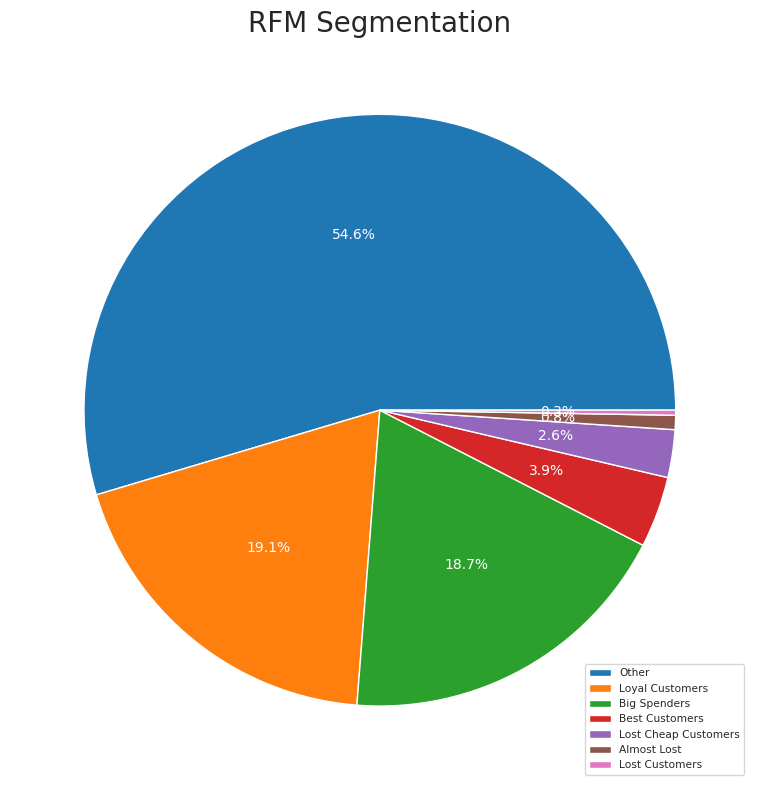

In [127]:
# visualisasi hasil
plt.figure(figsize=(8,8))
plt.pie(cnt_seg["CustomerID"],
        autopct = '%.1f%%',
        textprops = {'fontsize' : 10,
                     'color' : 'white'})
plt.title("RFM Segmentation", fontsize=20)
plt.legend(cnt_seg["segment"], loc='lower right', prop={'size': 7.7})
plt.tight_layout()
plt.show()

In [128]:
# takeout other
seg_new = cnt_seg[cnt_seg["segment"]!="Other"]

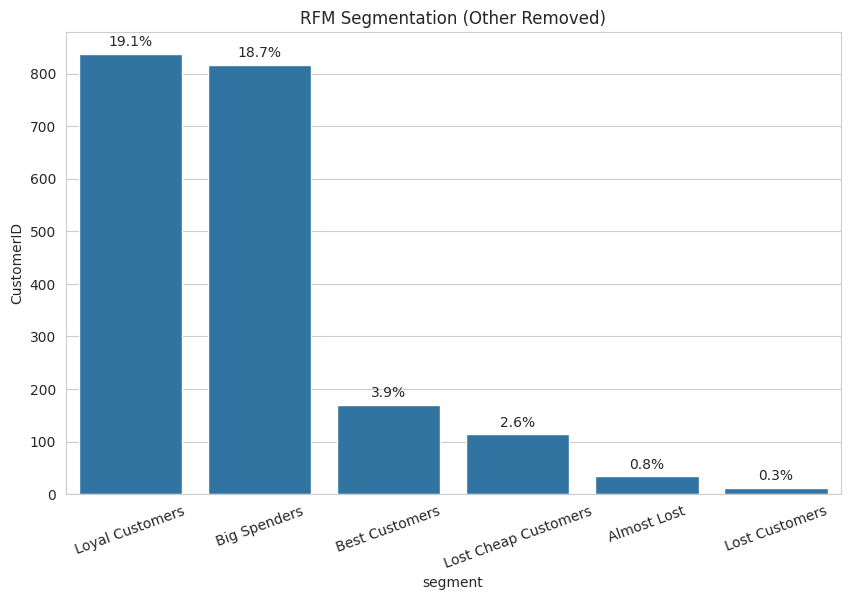

In [129]:
# visualisasi dengan barplot (takeout other segment)
plt.figure(figsize=(10,6))
x = seg_new["segment"]
y = seg_new["CustomerID"]
percentage = [i for i in seg_new["pct"]]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate(f'{percentage[i]}%', (x, y), ha='center')
plt.title("RFM Segmentation (Other Removed)")
plt.xticks(rotation=20)
plt.show()

> After calculating the number and visualizing the segments of the rfm score, we get:

> 1. The number of **Others** is still at 40.1%, this can still be done with further segmentation.

> 2. The next highest number in this segment is **Loyal Customers** and **Big Spenders**, meaning that the business is still healthy. Special programs can be made to increase customers in this category.

> 3. The number of **Best Customers** is in the range of 4.9%, a rewards program should be carried out to retain these customers.

> 4. If **Lost Cheap Customers**, **Almost Lost** and **Lost Customers** are considered churn customers then the number is 4.3% of all total customers where this number is quite reasonable if necessary can be retargeted to these customers.

## CLUSTERING

> try recency vs monetary, recency vs frequency, frequency vs monetary` then `pick the proper feature.

In [130]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

# Library for clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Library for DB Index to measure clustering results
from sklearn.metrics import davies_bouldin_score

In [131]:
# transfrom to array
X1 = np.asarray(rfm[["recency", "monetary"]])
X2 = np.asarray(rfm[["recency", "frequency"]])
X3 = np.asarray(rfm[["frequency", "monetary"]])

In [132]:
# range k from Kmeans
k = range(1, 10)
inertia = []
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X1)
    inertia.append(model.inertia_)

In [133]:
# cek inertia
for i,j in enumerate(inertia):
    print(f"iterasi {i} - inertia = {j}")

iterasi 0 - inertia = 295338808219.3727
iterasi 1 - inertia = 100057878094.20795
iterasi 2 - inertia = 49222777286.93028
iterasi 3 - inertia = 30246399058.472122
iterasi 4 - inertia = 17858016241.768677
iterasi 5 - inertia = 11668509630.058674
iterasi 6 - inertia = 8467881253.409416
iterasi 7 - inertia = 5504603249.735132
iterasi 8 - inertia = 4082218715.3147945


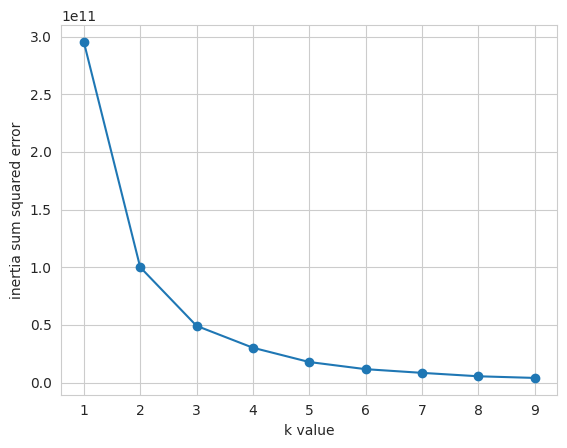

In [134]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [135]:
# fit model KMeans
model_km = KMeans(n_clusters = 4, max_iter = 1000, random_state=0)
model_km.fit(X1)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [136]:
# preditct clusters
rfm["cluster_km1"] = model_km.predict(X1)

In [137]:
# cek hasil
rfm.head()

CustomerID last_trans_date  recency  frequency  monetary  R_Quartile  \
0     12346.0      2011-01-18      325      180.0      0.00           4   
1     12347.0      2011-12-07        2      180.0   4310.00           1   
2     12348.0      2011-09-25       75      123.0   1797.24           3   
3     12349.0      2011-11-21       18      258.0   1757.55           2   
4     12350.0      2011-02-02      310     5903.0    334.40           4   

   F_Quartile  M_Quartile RFMScore          segment  cluster_km1  
0           2           4      424            Other            0  
1           2           1      121     Big Spenders            0  
2           3           1      331     Big Spenders            0  
3           2           1      221     Big Spenders            0  
4           1           3      413  Loyal Customers            0

In [138]:
# counts tiap clusters
rfm["cluster_km1"].value_counts()

0    4252
3     102
2      15
1       3
Name: cluster_km1, dtype: int64

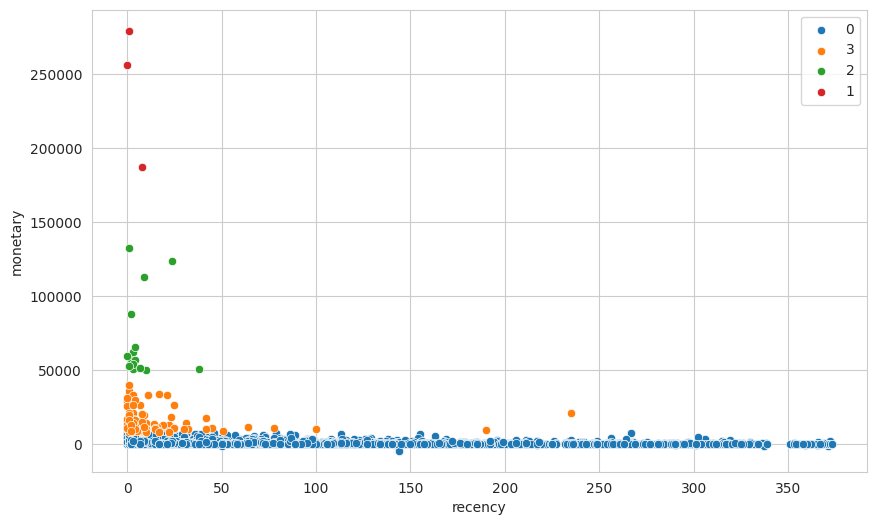

In [139]:
# plot hasil kmeans
plt.figure(figsize=(10,6))
# ax = fig.add _subplot(111, projection='3d')
for i in rfm["cluster_km1"].unique():
    sns.scatterplot(x =rfm["recency"][rfm["cluster_km1"] == i], y =rfm["monetary"][rfm["cluster_km1"] == i], label = i)

plt.legend()
plt.show()

> `general summary`

## EXPLORATORY DATA ANALYSIS

In [140]:
# merge to DataFrame
res = pd.merge(df1, rfm, on = "CustomerID")

In [141]:
res.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      20.34   

  TransactionDate  ...  last_trans_date recency  frequency  monetary  \
0      2010-12-01  ...       2011-02-10     302      312.0   5288.63   
1      2010-12-01  ...       2011-02-10     302      312.0   5288.63   
2      2010-12-01  ...       2011-02-10     302      312.0   5288.63   
3      2010-12-01  ...       2011-02-10     302      312.0   5288.63   
4      2010-12-01  ...       2011-02-10     302      312.0   5288.63   

   R_Quartile  F_Quartile  M_Quartile  RFMScore         segment cluster_km1  
0           4           1           1       411  Lost Customers           0  
1           4           1           1       411  Lost Customers           0  
2           4           1           1       411  Lost Customers           0  
3           4           1           1       411  Lost Customers           0  
4           4           1           1       411  Lost Customers           0  

[5 rows x 21 columns]

In [142]:
res.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalCost', 'TransactionDate',
       'cancelled', 'last_trans_date', 'recency', 'frequency', 'monetary',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMScore', 'segment',
       'cluster_km1'],
      dtype='object')

In [143]:
# make new feature
res['year_month'] = pd.to_datetime(res['TransactionDate']).dt.to_period('M')
res.tail()

InvoiceNo StockCode                       Description  Quantity  \
406824    581578     22993      SET OF 4 PANTRY JELLY MOULDS        12   
406825    581578     22907  PACK OF 20 NAPKINS PANTRY DESIGN        12   
406826    581578     22908     PACK OF 20 NAPKINS RED APPLES        12   
406827    581578     23215  JINGLE BELL HEART ANTIQUE SILVER        12   
406828    581578     22736       RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalCost  \
406824 2011-12-09 12:16:00       1.25     12713.0  Germany      15.00   
406825 2011-12-09 12:16:00       0.85     12713.0  Germany      10.20   
406826 2011-12-09 12:16:00       0.85     12713.0  Germany      10.20   
406827 2011-12-09 12:16:00       2.08     12713.0  Germany      24.96   
406828 2011-12-09 12:16:00       1.65     12713.0  Germany      16.50   

       TransactionDate  ...  recency frequency  monetary  R_Quartile  \
406824      2011-12-09  ...        0     452.0    848.55           1   
406825      2011-12-09  ...        0     452.0    848.55           1   
406826      2011-12-09  ...        0     452.0    848.55           1   
406827      2011-12-09  ...        0     452.0    848.55           1   
406828      2011-12-09  ...        0     452.0    848.55           1   

        F_Quartile  M_Quartile  RFMScore          segment cluster_km1  \
406824           1           2       112  Loyal Customers           0   
406825           1           2       112  Loyal Customers           0   
406826           1           2       112  Loyal Customers           0   
406827           1           2       112  Loyal Customers           0   
406828           1           2       112  Loyal Customers           0   

       year_month  
406824    2011-12  
406825    2011-12  
406826    2011-12  
406827    2011-12  
406828    2011-12  

[5 rows x 22 columns]

### How was the sales trend over the months ?

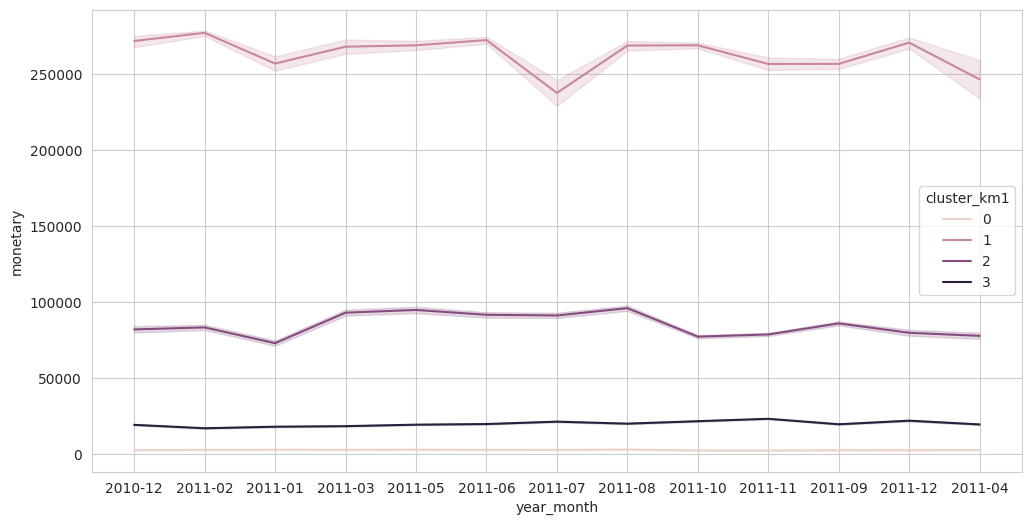

In [144]:
plt.figure(figsize=(12,6))
sns.lineplot(x=res["year_month"].astype(str), y=res["monetary"], hue=res["cluster_km1"])
plt.show()

### What are the most frequent purchased products?

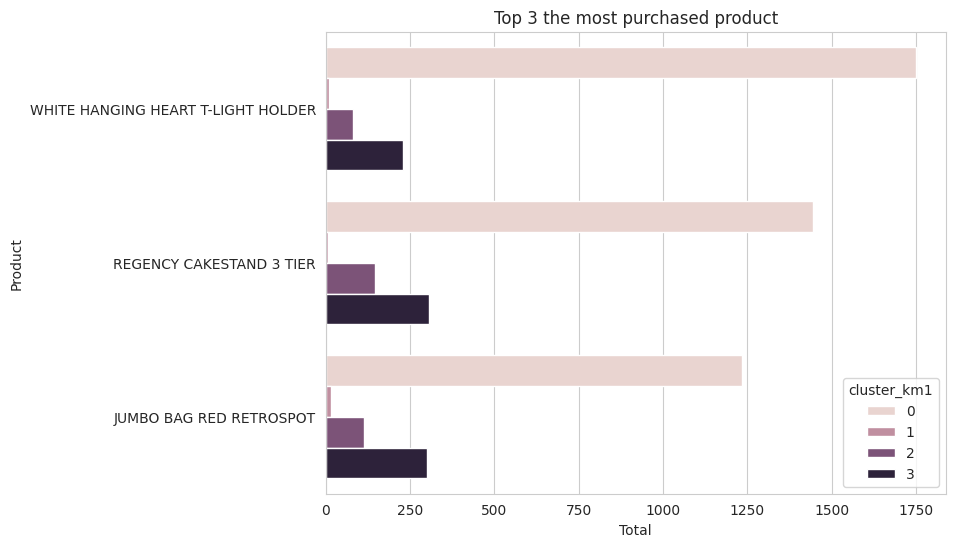

In [145]:
top_product = res['Description'].value_counts().head(3).index
plt.figure(figsize=(8,6))
sns.countplot(data=res, y='Description', hue='cluster_km1', order=top_product)
plt.title('Top 3 the most purchased product')
plt.xlabel('Total')
plt.ylabel('Product')
plt.show()

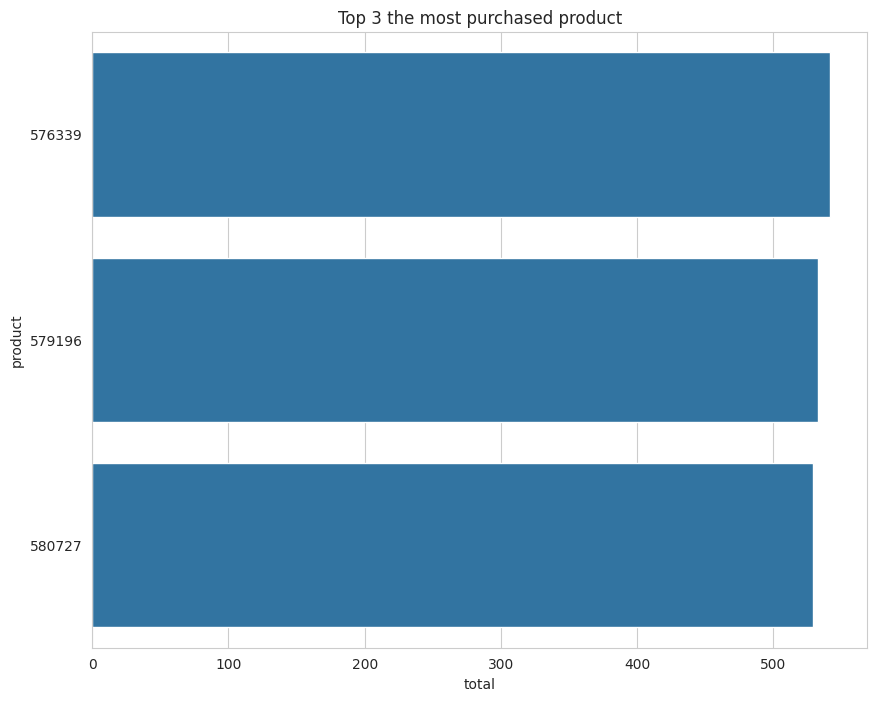

In [146]:
top_product = res['InvoiceNo'].value_counts().head(3).index
plt.figure(figsize=(10,8))
sns.countplot(data=res, y='InvoiceNo', order=top_product)
plt.title('Top 3 the most purchased product')
plt.xlabel('total')
plt.ylabel('product')
plt.show()

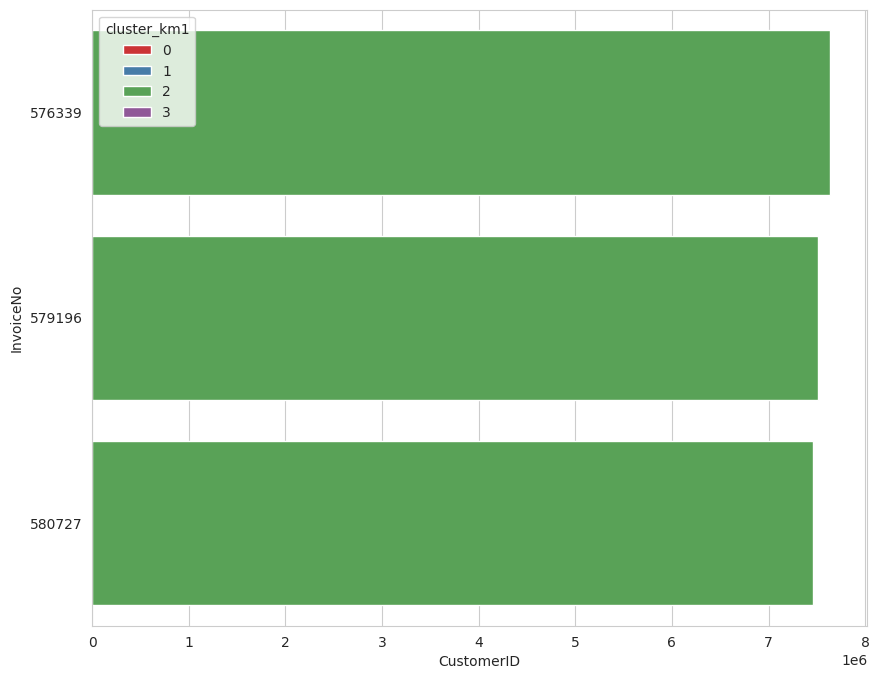

In [147]:
top_product = res['InvoiceNo'].value_counts().head(3).index
plt.figure(figsize=(10,8))
sns.barplot(data=res, x="CustomerID", y="InvoiceNo", hue="cluster_km1", palette="Set1", estimator=np.sum, order=top_product)
plt.show()

### How does each cluster/group contribute to the company's revenue?

In [148]:
import plotly.express as px

In [149]:
labels = res["cluster_km1"]
values = res["TotalCost"]
fig1 = px.pie(labels, values=values, names=labels)

fig1.show()

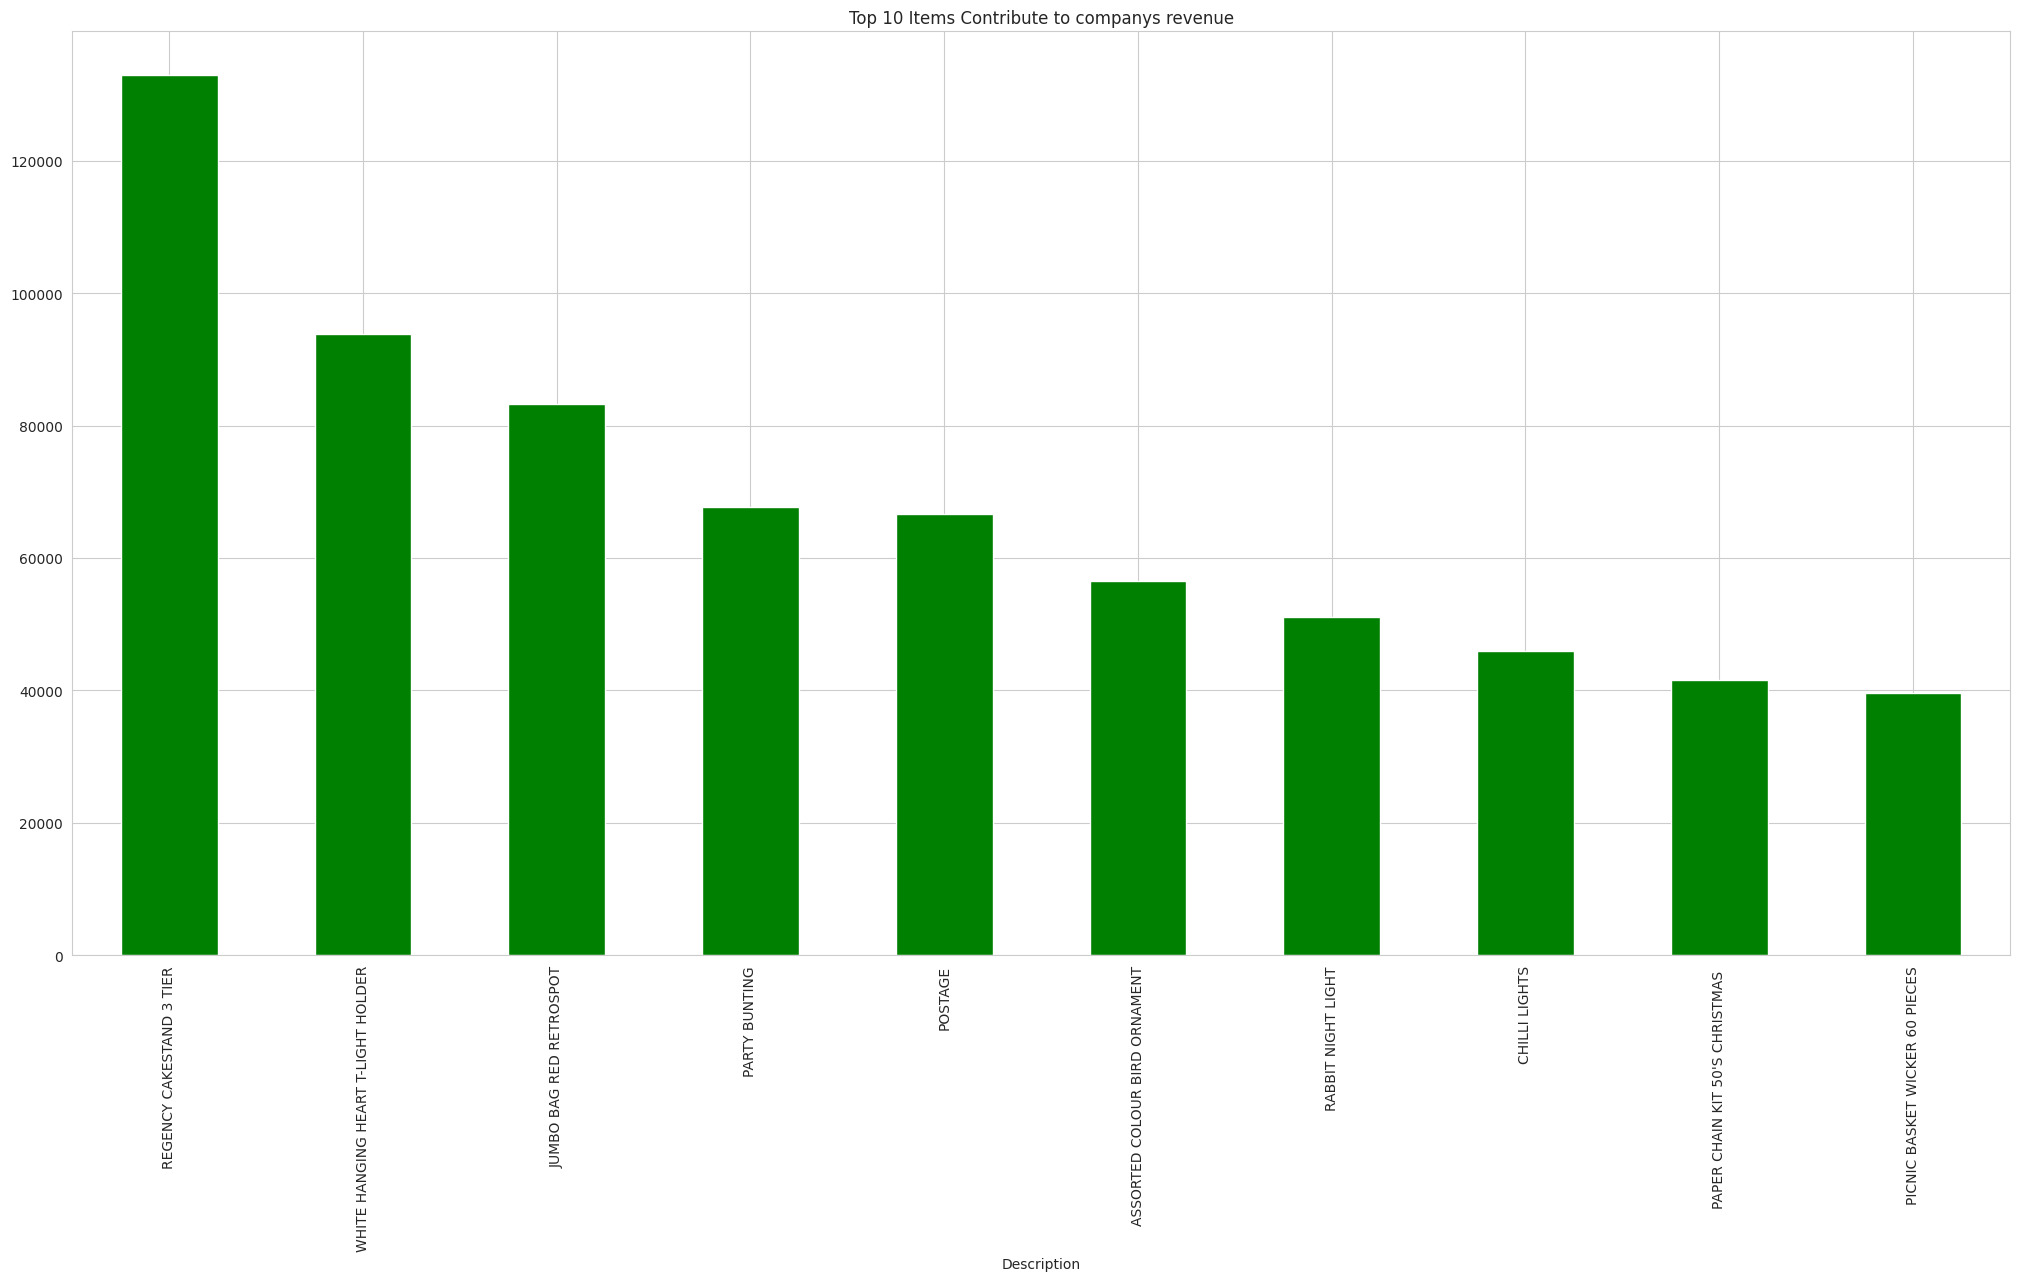

In [150]:
plt.figure(figsize=(25, 12))
res.groupby(["Description"]).TotalCost.sum().sort_values(ascending = False)[:10].plot(kind='bar', title='Amount Sales by Country', color='green')
plt.title('Top 10 Items Contribute to companys revenue')
plt.show()

### How many products does the customer purchase in each transaction?

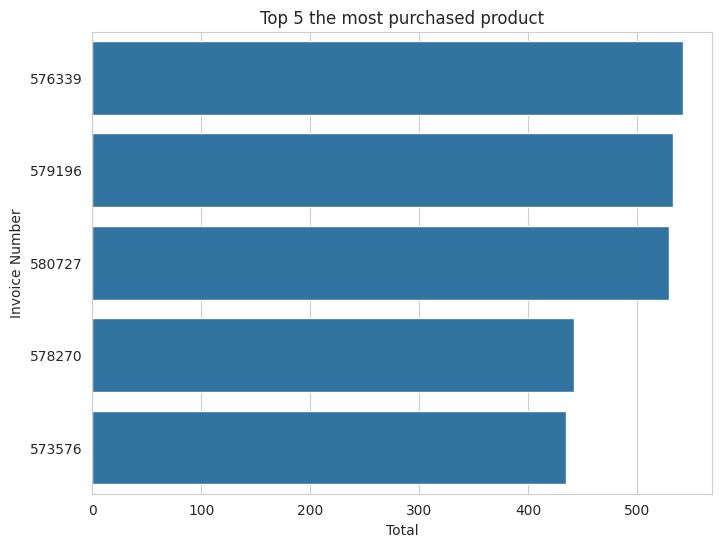

In [151]:
top_product = res['InvoiceNo'].value_counts().head(5).index
plt.figure(figsize=(8,6))
sns.countplot(data=res, y='InvoiceNo', order=top_product)
plt.title('Top 5 the most purchased product')
plt.xlabel('Total')
plt.ylabel('Invoice Number')
plt.show()

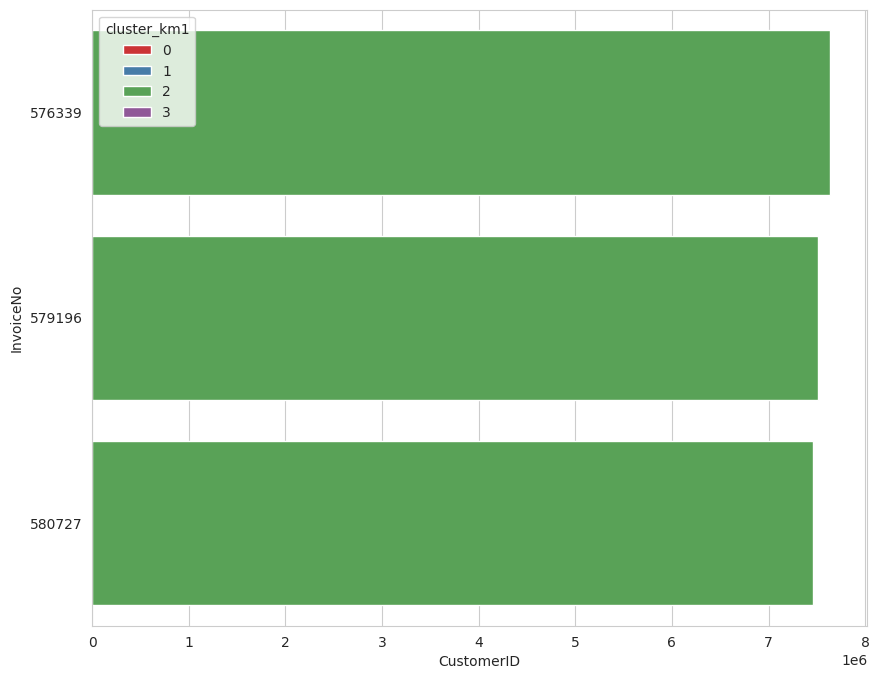

In [152]:
top_product = res['InvoiceNo'].value_counts().head(3).index
plt.figure(figsize=(10,8))
sns.barplot(data=res, x="CustomerID", y="InvoiceNo", hue="cluster_km1", palette="Set1", estimator=np.sum, order=top_product)
plt.show()

### How does each cluster/group contribute to the company's revenue?

In [153]:
for i in range(4):
    temp1 = res[(res['cluster_km1'] == i) & (res['Quantity'] < 0)]
    temp2 = res[(res['cluster_km1'] == i) & (res['Quantity'] > 0)]

    print(f"\nRevenue Cluster {i}:")
    print('Monetary = ', round((temp2['TotalCost'].sum())*1,), 'Pound')
    print('Mean Monetary = ', round((temp2['TotalCost'].mean())*1,), 'Pound')
    print('Cancelled = ', round((temp1['TotalCost'].sum())*1,), 'Pound')
    print('Mean Cancelled = ', round((temp1['TotalCost'].mean())*1,), 'Pound')


Revenue Cluster 0:
Monetary =  5375023 Pound
Mean Monetary =  17 Pound
Cancelled =  -439530 Pound
Mean Cancelled =  -66 Pound

Revenue Cluster 1:
Monetary =  734414 Pound
Mean Monetary =  258 Pound
Cancelled =  -11004 Pound
Mean Cancelled =  -524 Pound

Revenue Cluster 2:
Monetary =  1145975 Pound
Mean Monetary =  52 Pound
Cancelled =  -74622 Pound
Mean Cancelled =  -110 Pound

Revenue Cluster 3:
Monetary =  1655996 Pound
Mean Monetary =  34 Pound
Cancelled =  -86186 Pound
Mean Cancelled =  -55 Pound


### What are the interval date between transactions?


In [154]:
for i in range(4):
    ins5 = res[res["cluster_km1"] == i]
    ins5 = ins5[['last_trans_date', 'TransactionDate',  'recency']]
    print(f"Interval cluster {i}: Min(", ins5['recency'].min(), "days ), Max(" , ins5['recency'].max(), "days )")

Interval cluster 0: Min( 0 days ), Max( 373 days )
Interval cluster 1: Min( 0 days ), Max( 8 days )
Interval cluster 2: Min( 0 days ), Max( 38 days )
Interval cluster 3: Min( 0 days ), Max( 235 days )


### Based on your findings, what strategy could you recommend to the business to gain more profit?

- cluster0
we could offer a discount on the top 3 most popular items, such as the T-heart Holder, Regency cakestand 3 tier,
and big bag retrospot, for cluster 0 customers who have a high cancellation rate and make up the majority of
the population.

- cluster1
for cluster 1 (The best Customers) with high quality purchases, high total costs, and high recency. we could
create bundle promotions to motivate them and loyalty points for their regular purchases and large spends, the
bundling/discount includes the tp 3 products, which are the spaceboy lunch box, round snack box set of 4 boxes,
and postage.

- cluster2
the top 3 things for cluster 2 (the high spending and a few best customers) that we could discount are the
regency cakestand with 3 tiers, the gigantic bag in red retrospot, and the carriage.

- cluster3
regenct cakestand 3 tier, jumbo bag red retrospot and lunch bag red retrospot are the top 3 product we could discount
for cluster 3 (the big spenders and some of the best customers).


## PREDICTIVE MODEL BUILDING

> `explanation`

> `do the usual steps, start from feature engineering to model evaluation, use resample if necessary`

In [155]:
# gabung ke DataFrame
data = res[["Quantity","TotalCost","recency","frequency","monetary","cluster_km1","cancelled"]]

In [156]:
# cek hasil
data.head()

Quantity  TotalCost  recency  frequency  monetary  cluster_km1  cancelled
0         6      15.30      302      312.0   5288.63            0          0
1         6      20.34      302      312.0   5288.63            0          0
2         8      22.00      302      312.0   5288.63            0          0
3         6      20.34      302      312.0   5288.63            0          0
4         6      20.34      302      312.0   5288.63            0          0

In [157]:
# cek target
data["cancelled"].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

### Feature Engineering

- ### Scaling

In [158]:
data[["Quantity","TotalCost","recency","frequency","monetary"]] = RobustScaler().fit_transform(data[["Quantity","TotalCost","recency","frequency","monetary"]])

In [159]:
# cek hasil
data.head()

Quantity  TotalCost   recency  frequency  monetary  cluster_km1  cancelled
0       0.1   0.274510  7.972222   0.808612   0.52774            0          0
1       0.1   0.603922  7.972222   0.808612   0.52774            0          0
2       0.3   0.712418  7.972222   0.808612   0.52774            0          0
3       0.1   0.603922  7.972222   0.808612   0.52774            0          0
4       0.1   0.603922  7.972222   0.808612   0.52774            0          0

### Modeling

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer

# set up pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

# ensemble classifier models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier

In [161]:
# gabung ke DataFrame
res = pd.merge(df1, rfm, on = "CustomerID")

In [162]:
# gabung ke DataFrame
data = res[["Quantity","TotalCost","recency","frequency","monetary","cluster_km1","cancelled"]]

In [163]:
# cek hasil
data.head()

Quantity  TotalCost  recency  frequency  monetary  cluster_km1  cancelled
0         6      15.30      302      312.0   5288.63            0          0
1         6      20.34      302      312.0   5288.63            0          0
2         8      22.00      302      312.0   5288.63            0          0
3         6      20.34      302      312.0   5288.63            0          0
4         6      20.34      302      312.0   5288.63            0          0

In [164]:
# cek target
data["cancelled"].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

In [165]:
# split target
X = data.drop(['cancelled'], axis=1)
y = data['cancelled']

In [166]:
# train test split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [167]:
# cek sebelum resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (325463, 6)
y_train sebelum Resampling (325463,) 

label '1' sebelum Resampling 7082
label '0' sebelum Resampling 318381


In [168]:
# gunakan SMOTE+tomeklinks

st = SMOTETomek()
X_train_st, y_train_st = st.fit_resample(X_train, y_train)

In [169]:
# cek sesudah resampling
print('X_train sesudah Resampling', X_train_st.shape)
print('y_train sesudah Resampling', y_train_st.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_st == 1))
print("label '0' sesudah Resampling", sum(y_train_st == 0))

X_train sesudah Resampling (636762, 6)
y_train sesudah Resampling (636762,) 

label '1' sesudah Resampling 318381
label '0' sesudah Resampling 318381


In [170]:
dec_process = make_column_transformer( (RobustScaler(), ["Quantity",	"TotalCost",	"recency",	"frequency",	"monetary"]))

In [171]:
rf_pipe = Pipeline ([('transform', dec_process), ('model', RandomForestClassifier())])
et_pipe = Pipeline ([('transform', dec_process), ('model', ExtraTreesClassifier())])
ab_pipe = Pipeline ([('transform', dec_process), ('model',AdaBoostClassifier())])
gb_pipe = Pipeline ([('transform', dec_process), ('model', GradientBoostingClassifier())])

In [172]:
models = [rf_pipe, et_pipe, ab_pipe, gb_pipe]

In [173]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)

    return scores_train.mean(), scores_test["test_score"].mean()

In [174]:
for i in range (len(models)):
    models[i].fit(X_train_st, y_train_st)
    pred = models[i].predict(X_test)
    print('ensemble_model', i)
    print(classification_report(y_test, pred))
    print('cv:', cv_score(models[i], X_train_st, y_train_st, 'recall', 5))

ensemble_model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366

cv: (1.0, 1.0)
ensemble_model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      0.99      0.99      1823

    accuracy                           1.00     81366
   macro avg       1.00      0.99      1.00     81366
weighted avg       1.00      1.00      1.00     81366

cv: (0.9995438498390234, 0.9999733025034212)
ensemble_model 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg     

In [175]:
base_model = [('rf', RandomForestClassifier()),
               ('et', ExtraTreesClassifier()),
               ('ab', AdaBoostClassifier()),
               ('gb', GradientBoostingClassifier())]

# meta learner
meta = RandomForestClassifier()

In [176]:
meta_models = StackingClassifier(estimators=base_model, final_estimator=meta, cv=5)

In [177]:
meta_pipe = Pipeline ([('transform', dec_process), ('model', meta_models)])

In [178]:
meta_pipe.fit(X_train_st, y_train_st)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['Quantity', 'TotalCost',
                                                   'recency', 'frequency',
                                                   'monetary'])])),
                ('model',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier()),
                                                ('et', ExtraTreesClassifier()),
                                                ('ab', AdaBoostClassifier()),
                                                ('gb',
                                                 GradientBoostingClassifier())],
                                    final_estimator=RandomForestClassifier()))])

In [179]:
y_pred_meta = meta_pipe.predict(X_test)

In [180]:
print(classification_report(y_test, y_pred_meta))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [ ]:
res.to_csv("data2_rfm.csv", index=0)